In [1]:
#IMPORT LIBRERIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading our data

asos=pd.read_csv('data/asos_clean.csv')
asos.head(50)

,name,price,#search,#brand,categories,#colour,#1,#1num,#2,#2num,potential_hashtag
0,New Look trench coat in camel,49.99,coat,stradivarius,coats,beige,beigecoat,30000,stradivariuscoat,1600,31600
1,New Look trench coat in camel,49.99,coat,stradivarius,coats,beige,beigecoat,30000,stradivariuscoat,1600,31600
2,New Look trench coat in camel,49.99,coat,asos design,coats,beige,beigecoat,30000,asosdesigncoat,3,30003
3,New Look trench coat in camel,49.99,coat,new look,coats,beige,beigecoat,30000,newlookcoat,888,30888
4,Stradivarius double breasted wool coat in grey,59.99,coat,stradivarius,coats,grey,greycoat,36000,stradivariuscoat,1600,37600
5,Stradivarius double breasted wool coat in grey,59.99,coat,stradivarius,coats,grey,greycoat,36000,stradivariuscoat,1600,37600
6,Stradivarius double breasted wool coat in grey,59.99,coat,barneys originals,coats,grey,greycoat,36000,barneysoriginalscoat,0,36000
7,Stradivarius double breasted wool coat in grey,59.99,coat,stradivarius,coats,grey,greycoat,36000,stradivariuscoat,1600,37600
8,JDY oversized trench coat in stone,45.00,coat,asos petite,coats,grey,greycoat,36000,asospetitecoat,1,36001
9,JDY oversized trench coat in stone,45.00,coat,jdy,coats,grey,greycoat,36000,jdycoat,0,36000


In [9]:
asos.shape

(29777, 11)

<Axes: xlabel='price', ylabel='Count'>

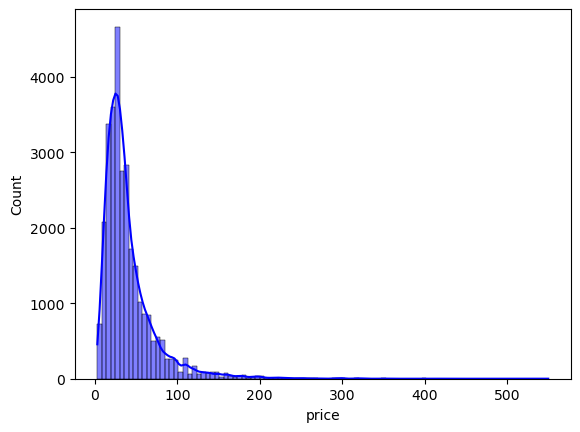

In [61]:
#We can see that most of the products cost less than 300£. In fact, the majority are less than 100£.
sns.histplot(asos["price"], color="blue", label="price", bins=100, kde = True, alpha=0.5)

<Axes: xlabel='potential_hashtag', ylabel='Count'>

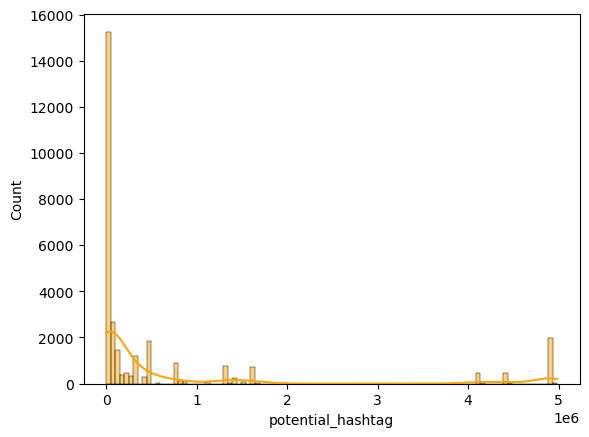

In [63]:
# Here we can see that most of our potencial hashtags have less than 1M uses.
sns.histplot(asos["potential_hashtag"], color="orange", label="potential_hashtag", bins=100, kde = True, alpha=0.5)

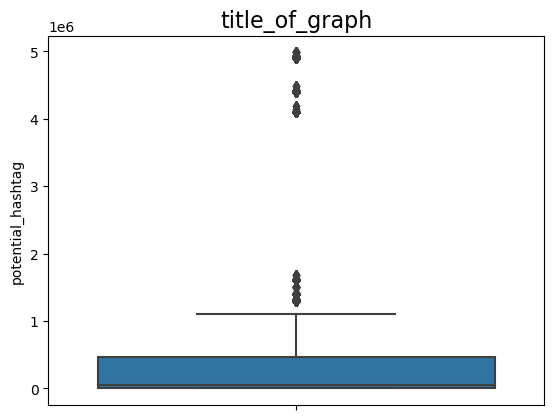

In [64]:
#Here it's even easier to see. We can also see that we have some outliers between 4 and 5 millions.
sns.boxplot(y=asos['potential_hashtag'])
plt.title('title_of_graph', fontsize=16)
plt.show()

In [66]:
#Here we can see that our potential hashtags are between 5727 and 465000 uses
q1, q3.percentile(asos['potential_hashtag'],[25, 75])
print (q1, q3)

5727.0 465000.0


In [67]:
iqr = q3 - q1
print(iqr)

459273.0


In [10]:
#ANALYZING AND EXPLORING PRICE COLUMN

asos['price'].value_counts()

30.00     895
28.00     762
32.00     678
35.00     674
18.00     651
         ... 
187.50      1
62.97       1
12.10       1
53.19       1
16.20       1
Name: price, Length: 684, dtype: int64

In [11]:
#THIS IS THE MOST EXPENSIVE PRODUCT IN OUR DF
asos['price'].max()

550.0

In [12]:
#THIS IS THE POSITION INDEX OF OUR MOST EXPENSIVE PRODUCT

maxValueIndex = asos['price'].idxmax()
maxValueIndex

1212

In [13]:
#AND THIS IS THE MOST EXPENSIVE PRODUCT

asos['#search'][1212]

'coat'

In [14]:
#THIS IS THE CHEAPEST PRODUCT IN OUR DF

asos['price'].min()

3.0

In [15]:
#THIS IS THE POSITION INDEX OF OUR CHEAPEST PRODUCT

minValueIndex = asos['price'].idxmin()
minValueIndex

18219

In [16]:
#AND THIS IS THE CHEAPEST PRODUCT

asos['#search'][18219]

'top'

In [17]:
#THE MEDIA PRICE OF ALL OUR PRODUCTS

asos['price'].mean()

40.89676461698626

In [18]:
#OUR TOP 10 MORE EXPENSIVE PRODUCTS

top_10_prices = asos.nlargest(10, 'price', keep='first')
top_10_prices

,name,price,#search,#brand,categories,#colour,#1,#1num,#2,#2num,potential_hashtag
1212,TSTM Unisex Premium Limited Edition patchwork ...,550.0,coat,topman,coats,black,blackcoat,133000,topmancoat,143,133143
1598,Napapijri x fiorucci skidoo jacket in white,465.0,coat,napapijri,coats,white,whitecoat,443000,napapijricoat,34,443034
3056,The North Face Lhotse Duster padded down coat ...,425.0,coat,the north face,coats,black,blackcoat,133000,thenorthfacecoat,477,133477
2445,Napapijri skidoo jacket in off white with faux...,420.0,coat,napapijri,coats,white,whitecoat,443000,napapijricoat,34,443034
1806,The North Face Nuptse belted long down parka c...,400.0,coat,the north face,coats,black,blackcoat,133000,thenorthfacecoat,477,133477
2088,The North Face Nuptse belted long down parka c...,400.0,coat,the north face,coats,brown,browncoat,36000,thenorthfacecoat,477,36477
1358,AllSaints Esme long check coat in multi,399.0,coat,allsaints,coats,black,blackcoat,133000,allsaintscoat,377,133377
1089,The North Face Freeride 3L ski jacket in white,380.0,skijacket,the north face,jackets,gardenwht/chamsorg/t,gardenwht/chamsorg/tskijacket,0,thenorthfaceskijacket,0,0
1236,AllSaints Benyon leather biker jacket in black,359.0,coat,allsaints,coats,black,blackcoat,133000,allsaintscoat,377,133377
1958,The North Face Himalayan down parka coat in black,350.0,coat,the north face,coats,black,blackcoat,133000,thenorthfacecoat,477,133477


In [19]:
# Exploratory 'price' using matplotlib

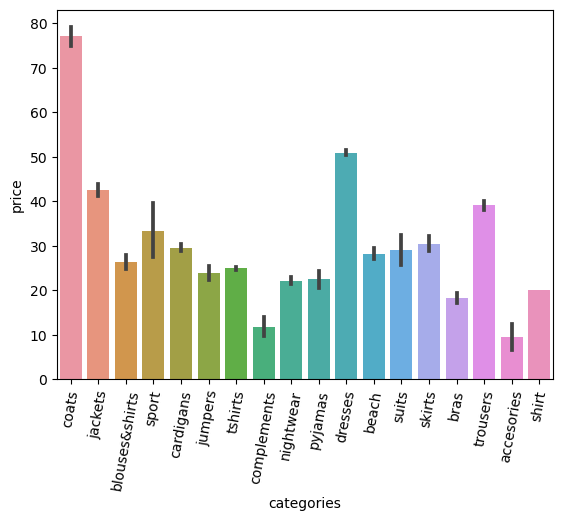

In [20]:
#THE MOST EXPENSIVE PRODUCTS ARE FORM THE CATEGORY COATS AND DRESSES

sns.barplot(x="categories", y="price", data=asos)

# Get the current axes (axs[0]) and rotate the x-axis labels
plt.xticks(rotation=80)

plt.show()

In [22]:
#ANALYZING AND EXPLORING 'brand' COLUMN

asos['#brand'].value_counts()

asos design                4750
topshop                    1580
asos curve                  982
miss selfridge              673
collusion                   648
                           ... 
ted baker                     1
miss selfridge petite         1
anaya maternity               1
new girl order curve          1
nobodys child maternity       1
Name: #brand, Length: 430, dtype: int64

In [36]:
# this are the top 10 most frequent brands
top_10_brands = asos['#brand'].value_counts()[:10].index.tolist()
top_10_brands

['asos design',
 'topshop',
 'asos curve',
 'miss selfridge',
 'collusion',
 'river island',
 'monki',
 'bershka',
 'asos tall',
 'new look']

In [25]:
asos.groupby('#brand').sum()

/var/folders/75/lxv2pt816y3g7mh_b0zy07mw0000gn/T/ipykernel_2332/4240632767.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  asos.groupby('#brand').sum()


,price,#1num,#2num,potential_hashtag
#brand,,,,
4th reckless,2053.90,8991207,88,8991295
4th reckless petite,134.00,47900,0,47900
4th reckless plus,70.00,7509,0,7509
4th reckless tall,475.75,1079318,0,1079318
abercrombie fitch,4526.10,40030403,262,40030665
...,...,...,...,...
yas petite,220.00,0,0,0
yaura,846.50,5423900,10,5423910
yaura plus,453.50,10650000,0,10650000


In [26]:
#ANALYZING AND EXPLORING '#colour' COLUMN
asos['#colour'].value_counts()

black              7401
green              2528
blue               2423
white              2397
pink               2340
                   ... 
jellybean strps       1
pattern rainbow       1
humus                 1
sky captain           1
ombre cardi           1
Name: #colour, Length: 992, dtype: int64

In [27]:
# top 10 most frequent colours
asos['#colour'].value_counts()[:10].index.tolist()

['black',
 'green',
 'blue',
 'white',
 'pink',
 'beige',
 'brown',
 'pattern',
 'grey',
 'red']

In [41]:
asos.groupby('#colour').sum()

/var/folders/75/lxv2pt816y3g7mh_b0zy07mw0000gn/T/ipykernel_2332/2384657259.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  asos.groupby('#colour').sum()


,price,#1num,#2num,potential_hashtag
#colour,,,,
",beige",26.00,0,18,18
-,106.50,0,0,0
310 caramel,17.00,0,853,853
320 brown,14.50,0,853,853
90s rainbow,76.00,0,83,83
...,...,...,...,...
yin yang pattern,21.50,0,5,5
zadie star,34.00,0,0,0
zaria stripes,26.50,0,491,491


In [29]:
#ANALYZING AND EXPLORING '#1num' COLUMN

asos['#1num'].value_counts()

4900000    2007
465000     1823
0          1675
753000      916
302000      838
           ... 
173000        1
623           1
902           1
986           1
8800          1
Name: #1num, Length: 511, dtype: int64

In [30]:
#THIS IS THE BIGGEST NUMBER OF USES A HASHTAG IN OUR DF HAVE.

asos['#1num'].max()

4900000

In [31]:
#THIS IS THE MEAN NUMBER OF USES A HASHTAG IN OUR DF HAVE.

asos['#1num'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0          30000
1          30000
2          30000
3          30000
4          36000
          ...   
29772      68000
29773          8
29774    4900000
29775    4900000
29776    4900000
Name: #1num, Length: 29777, dtype: int64>

In [32]:
#AND THIS IS THE TOP 10 BY NUMBER OF USES OF A HASHTAG.

top_100_hashtag_1 = asos.nlargest(100, '#1num', keep='first')
top_100_hashtag_1.head(50)

,name,price,#search,#brand,categories,#colour,#1,#1num,#2,#2num,potential_hashtag
5791,ASOS DESIGN grown on neck mini dress with ruch...,18.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053
5792,ASOS DESIGN ribbed scoop neck vest mini dress ...,14.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053
5797,ASOS DESIGN high neck bodycon midi dress with ...,24.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053
5803,Daisy Street relaxed smock dress in grunge floral,26.00,dress,daisy street,dresses,black,blackdress,4900000,daisystreetdress,7,4900007
5806,ASOS DESIGN Supersoft button through cardigan ...,34.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053
5807,ASOS DESIGN knitted mini jumper dress in rib i...,30.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053
5808,ASOS Weekend Collective oversized sweat dress ...,30.00,dress,asos weekend collective,dresses,black,blackdress,4900000,asosweekendcollectivedress,0,4900000
5821,ASOS DESIGN square neck midi smock sundress in...,26.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053
5822,ASOS DESIGN burnout button through shirred wai...,50.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053
5823,ASOS DESIGN waisted long sleeve midi tea dress...,30.00,dress,asos design,dresses,black,blackdress,4900000,asosdesigndress,53,4900053


In [34]:
#HERE WE HAVE THE TOP 10 BY NUMBER OF USES OF A HASHTAG IN THE COLUMN #2.

top_100_hashtag_2 = asos.nlargest(100, '#2num', keep='first')
top_100_hashtag_2.head(50)

,name,price,#search,#brand,categories,#colour,#1,#1num,#2,#2num,potential_hashtag
739,adidas running marathon jacket in black,47.00,jacket,adidas,jackets,black,blackjacket,232000,adidasjacket,116000,348000
968,adidas Originals shattered trefoil track top i...,47.50,jacket,adidas,jackets,black,blackjacket,232000,adidasjacket,116000,348000
1539,adidas Adizero marathon jacket in white,58.50,jacket,adidas,jackets,white,whitejacket,77000,adidasjacket,116000,193000
3206,adidas Adicolor classics track jacket in burgundy,23.40,jacket,adidas,jackets,red,redjacket,191000,adidasjacket,116000,307000
1712,The North Face Hyalite Down hooded jacket in b...,200.00,jacket,the north face,jackets,black,blackjacket,232000,thenorthfacejacket,99000,331000
1735,The North Face Quest cropped jacket in black,50.00,jacket,the north face,jackets,black,blackjacket,232000,thenorthfacejacket,99000,331000
1823,The North Face Sheru jacket in yellow,58.50,jacket,the north face,jackets,yellow,yellowjacket,190000,thenorthfacejacket,99000,289000
2147,The North Face Metropolis down puffer parka co...,325.00,jacket,the north face,jackets,black,blackjacket,232000,thenorthfacejacket,99000,331000
2231,The North Face Hydrenaline jacket in pink,60.50,jacket,the north face,jackets,pink,pinkjacket,85000,thenorthfacejacket,99000,184000
2662,The North Face Aconcagua hooded down jacket in...,200.00,jacket,the north face,jackets,black,blackjacket,232000,thenorthfacejacket,99000,331000
